In [210]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from itertools import combinations
from math import sqrt
from scipy.stats import linregress
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split


In [2]:
### RED WINE ANALYSIS ###

In [8]:
# Data source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

filename = "data/winequality-red.csv"
delimiter = ";"
red = pd.read_csv(filename, delimiter=delimiter)
red.shape

(1599, 12)

In [9]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# Review summary stats
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
# Check for nulls
print("Columns contains nulls")
print("----------------------")
for col in red.columns:
    print("{}: {}".format(
        col, red[col].isnull().any()))

Columns contains nulls
----------------------
fixed acidity: False
volatile acidity: False
citric acid: False
residual sugar: False
chlorides: False
free sulfur dioxide: False
total sulfur dioxide: False
density: False
pH: False
sulphates: False
alcohol: False
quality: False


In [16]:
# Review "quality" column values and their counts
# "quality" column should be response variable in this data set
red["quality"].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [17]:
# Review quality column frequency of values
red["quality"].value_counts().sort_index() / red["quality"].count()

3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: quality, dtype: float64

In [18]:
# Want a binary value classification

# Add new column to indicate if 
# quality value is above 5
red["high_quality"] = red["quality"].apply(lambda x: 1 if x > 5 else 0)
red["high_quality"].value_counts().sort_index()

0    744
1    855
Name: high_quality, dtype: int64

In [20]:
red["high_quality"].value_counts().sort_index() / red["quality"].count()

0    0.465291
1    0.534709
Name: high_quality, dtype: float64

In [81]:
### Plot data ###

In [179]:
# Show columns to guide building plots
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'high_quality'],
      dtype='object')

In [180]:
### PLOTS CREATED BELOW ###

# HISTOGRAM - Distribution of each potential explanatory variable.
# BOXPLOT - Boxplot of quality rating for each potential explanatory variable.
# MEDIAN RANGE - Analysis of size of differences in medians shown in boxplot. 


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


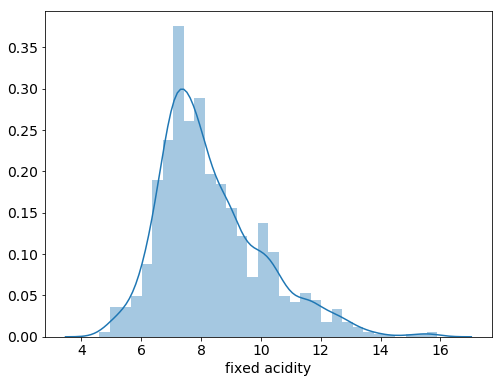

In [130]:
y_var = red.columns[0]
x_var = "quality"
data_var = red
sns.distributions.distplot(a=data_var.loc[:, y_var])

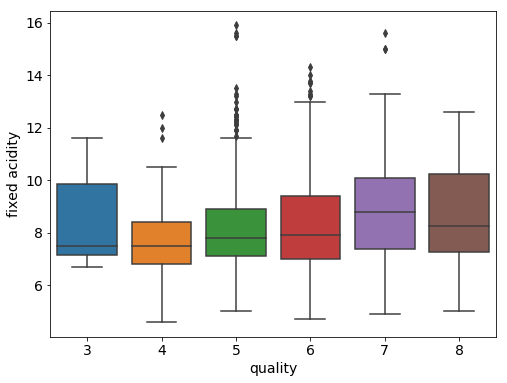

In [113]:
y_var = red.columns[0]
x_var = "quality"
data_var = red
sns.categorical.boxplot(x=x_var, y=y_var, data=data_var)

In [167]:
y_var = red.columns[0]
x_var = "quality"
data_var = red
univariate_median_by_quality = data_var.groupby(x_var).median()[y_var]

var = univariate_median_by_quality.name
min_rating = univariate_median_by_quality.index[0]
min_median = univariate_median_by_quality.iloc[0]
max_rating = univariate_median_by_quality.index[-1]
max_median = univariate_median_by_quality.iloc[-1]
range_median = abs(univariate_median_by_quality.iloc[-1] - univariate_median_by_quality.iloc[0])
perc_range = range_median / min_median

print("Variable: {}".format(var))
print("Median of minimum quality (rating {}): {}".format(min_rating, min_median))
print("Median of maximum quality (rating {}): {}".format(max_rating, max_median))
print("Median range: {}".format(range_median))
print("Median range % : {:.1f}%".format(perc_range*100))


Variable: fixed acidity
Median of minimum quality (rating 3): 7.5
Median of maximum quality (rating 8): 8.25
Median range: 0.75
Median range % : 10.0%


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


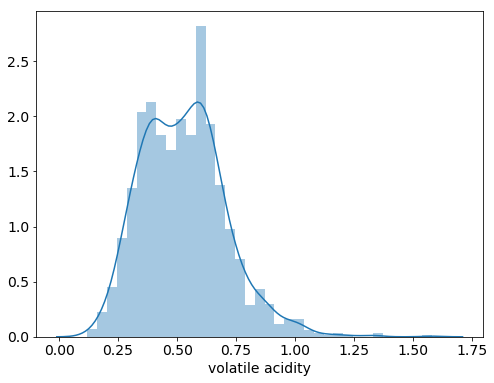

In [135]:
y_var = red.columns[1]
x_var = "quality"
data_var = red
sns.distributions.distplot(a=data_var.loc[:, y_var])

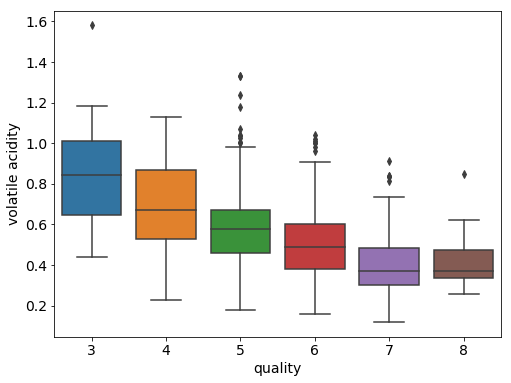

In [132]:
y_var = red.columns[1]
x_var = "quality"
data_var = red
sns.categorical.boxplot(x=x_var, y=y_var, data=data_var)

In [169]:
y_var = red.columns[1]
x_var = "quality"
data_var = red
univariate_median_by_quality = data_var.groupby(x_var).median()[y_var]

var = univariate_median_by_quality.name
min_rating = univariate_median_by_quality.index[0]
min_median = univariate_median_by_quality.iloc[0]
max_rating = univariate_median_by_quality.index[-1]
max_median = univariate_median_by_quality.iloc[-1]
range_median = abs(univariate_median_by_quality.iloc[-1] - univariate_median_by_quality.iloc[0])
perc_range = range_median / min_median

print("Variable: {}".format(var))
print("Median of minimum quality (rating {}): {}".format(min_rating, min_median))
print("Median of maximum quality (rating {}): {}".format(max_rating, max_median))
print("Median range: {}".format(range_median))
print("Median range % : {:.1f}%".format(perc_range*100))


Variable: volatile acidity
Median of minimum quality (rating 3): 0.845
Median of maximum quality (rating 8): 0.37
Median range: 0.475
Median range % : 56.2%


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


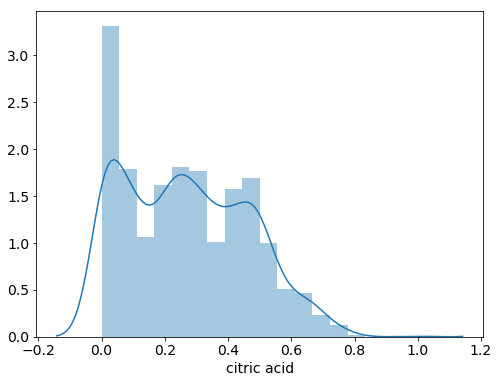

In [136]:
y_var = red.columns[2]
x_var = "quality"
data_var = red
sns.distributions.distplot(a=data_var.loc[:, y_var])

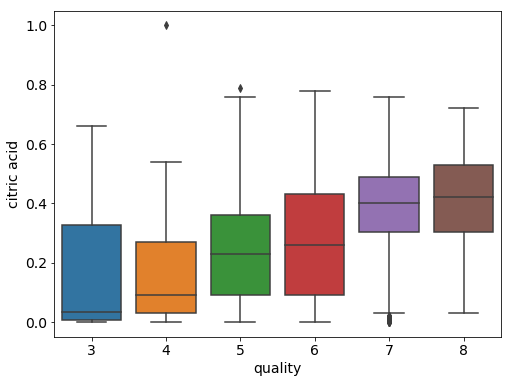

In [115]:
y_var = red.columns[2]
x_var = "quality"
data_var = red
sns.categorical.boxplot(x=x_var, y=y_var, data=data_var)

In [170]:
y_var = red.columns[2]
x_var = "quality"
data_var = red
univariate_median_by_quality = data_var.groupby(x_var).median()[y_var]

var = univariate_median_by_quality.name
min_rating = univariate_median_by_quality.index[0]
min_median = univariate_median_by_quality.iloc[0]
max_rating = univariate_median_by_quality.index[-1]
max_median = univariate_median_by_quality.iloc[-1]
range_median = abs(univariate_median_by_quality.iloc[-1] - univariate_median_by_quality.iloc[0])
perc_range = range_median / min_median

print("Variable: {}".format(var))
print("Median of minimum quality (rating {}): {}".format(min_rating, min_median))
print("Median of maximum quality (rating {}): {}".format(max_rating, max_median))
print("Median range: {}".format(range_median))
print("Median range % : {:.1f}%".format(perc_range*100))


Variable: citric acid
Median of minimum quality (rating 3): 0.035
Median of maximum quality (rating 8): 0.42000000000000004
Median range: 0.385
Median range % : 1100.0%


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


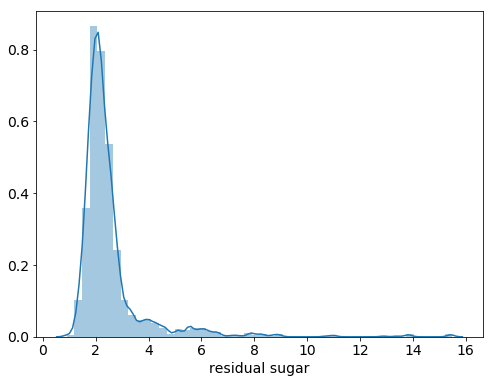

In [138]:
y_var = red.columns[3]
x_var = "quality"
data_var = red
sns.distributions.distplot(a=data_var.loc[:, y_var])

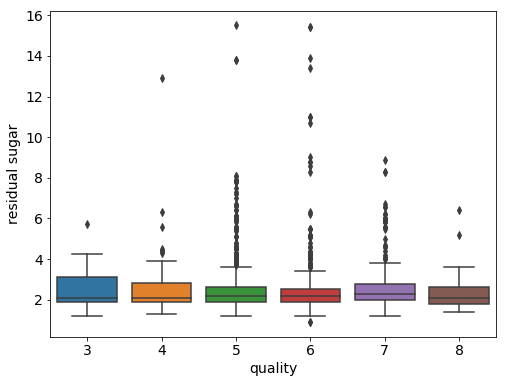

In [116]:
y_var = red.columns[3]
x_var = "quality"
data_var = red
sns.categorical.boxplot(x=x_var, y=y_var, data=data_var)

In [171]:
y_var = red.columns[3]
x_var = "quality"
data_var = red
univariate_median_by_quality = data_var.groupby(x_var).median()[y_var]

var = univariate_median_by_quality.name
min_rating = univariate_median_by_quality.index[0]
min_median = univariate_median_by_quality.iloc[0]
max_rating = univariate_median_by_quality.index[-1]
max_median = univariate_median_by_quality.iloc[-1]
range_median = abs(univariate_median_by_quality.iloc[-1] - univariate_median_by_quality.iloc[0])
perc_range = range_median / min_median

print("Variable: {}".format(var))
print("Median of minimum quality (rating {}): {}".format(min_rating, min_median))
print("Median of maximum quality (rating {}): {}".format(max_rating, max_median))
print("Median range: {}".format(range_median))
print("Median range % : {:.1f}%".format(perc_range*100))


Variable: residual sugar
Median of minimum quality (rating 3): 2.1
Median of maximum quality (rating 8): 2.1
Median range: 0.0
Median range % : 0.0%


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


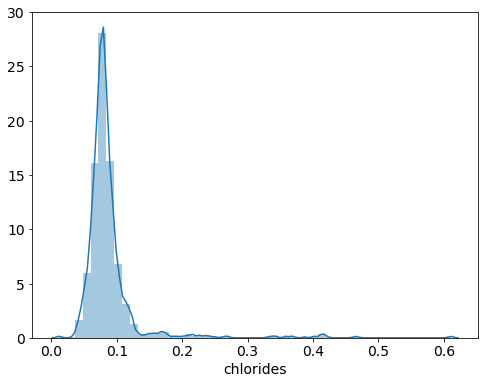

In [139]:
y_var = red.columns[4]
x_var = "quality"
data_var = red
sns.distributions.distplot(a=data_var.loc[:, y_var])

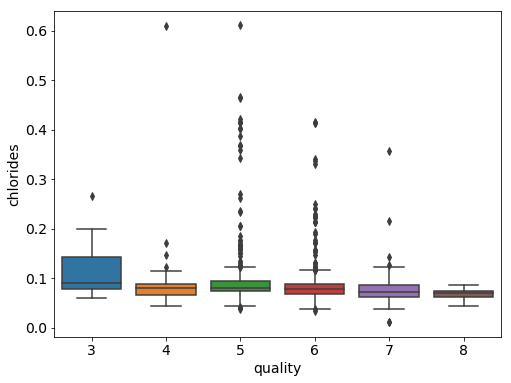

In [117]:
y_var = red.columns[4]
x_var = "quality"
data_var = red
sns.categorical.boxplot(x=x_var, y=y_var, data=data_var)

In [172]:
y_var = red.columns[4]
x_var = "quality"
data_var = red
univariate_median_by_quality = data_var.groupby(x_var).median()[y_var]

var = univariate_median_by_quality.name
min_rating = univariate_median_by_quality.index[0]
min_median = univariate_median_by_quality.iloc[0]
max_rating = univariate_median_by_quality.index[-1]
max_median = univariate_median_by_quality.iloc[-1]
range_median = abs(univariate_median_by_quality.iloc[-1] - univariate_median_by_quality.iloc[0])
perc_range = range_median / min_median

print("Variable: {}".format(var))
print("Median of minimum quality (rating {}): {}".format(min_rating, min_median))
print("Median of maximum quality (rating {}): {}".format(max_rating, max_median))
print("Median range: {}".format(range_median))
print("Median range % : {:.1f}%".format(perc_range*100))


Variable: chlorides
Median of minimum quality (rating 3): 0.0905
Median of maximum quality (rating 8): 0.07050000000000001
Median range: 0.01999999999999999
Median range % : 22.1%


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


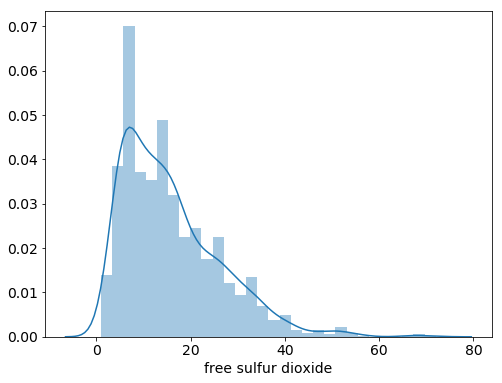

In [140]:
y_var = red.columns[5]
x_var = "quality"
data_var = red
sns.distributions.distplot(a=data_var.loc[:, y_var])

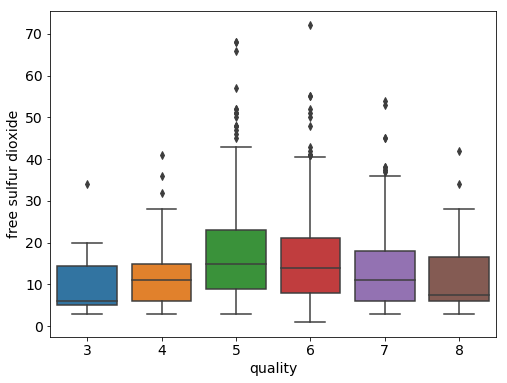

In [118]:
y_var = red.columns[5]
x_var = "quality"
data_var = red
sns.categorical.boxplot(x=x_var, y=y_var, data=data_var)

In [173]:
y_var = red.columns[5]
x_var = "quality"
data_var = red
univariate_median_by_quality = data_var.groupby(x_var).median()[y_var]

var = univariate_median_by_quality.name
min_rating = univariate_median_by_quality.index[0]
min_median = univariate_median_by_quality.iloc[0]
max_rating = univariate_median_by_quality.index[-1]
max_median = univariate_median_by_quality.iloc[-1]
range_median = abs(univariate_median_by_quality.iloc[-1] - univariate_median_by_quality.iloc[0])
perc_range = range_median / min_median

print("Variable: {}".format(var))
print("Median of minimum quality (rating {}): {}".format(min_rating, min_median))
print("Median of maximum quality (rating {}): {}".format(max_rating, max_median))
print("Median range: {}".format(range_median))
print("Median range % : {:.1f}%".format(perc_range*100))


Variable: free sulfur dioxide
Median of minimum quality (rating 3): 6.0
Median of maximum quality (rating 8): 7.5
Median range: 1.5
Median range % : 25.0%


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


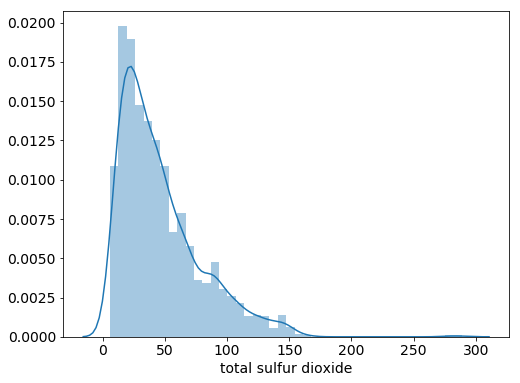

In [141]:
y_var = red.columns[6]
x_var = "quality"
data_var = red
sns.distributions.distplot(a=data_var.loc[:, y_var])

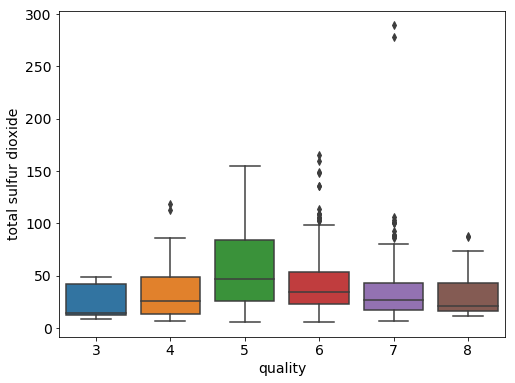

In [119]:
y_var = red.columns[6]
x_var = "quality"
data_var = red
sns.categorical.boxplot(x=x_var, y=y_var, data=data_var)

In [174]:
y_var = red.columns[6]
x_var = "quality"
data_var = red
univariate_median_by_quality = data_var.groupby(x_var).median()[y_var]

var = univariate_median_by_quality.name
min_rating = univariate_median_by_quality.index[0]
min_median = univariate_median_by_quality.iloc[0]
max_rating = univariate_median_by_quality.index[-1]
max_median = univariate_median_by_quality.iloc[-1]
range_median = abs(univariate_median_by_quality.iloc[-1] - univariate_median_by_quality.iloc[0])
perc_range = range_median / min_median

print("Variable: {}".format(var))
print("Median of minimum quality (rating {}): {}".format(min_rating, min_median))
print("Median of maximum quality (rating {}): {}".format(max_rating, max_median))
print("Median range: {}".format(range_median))
print("Median range % : {:.1f}%".format(perc_range*100))


Variable: total sulfur dioxide
Median of minimum quality (rating 3): 15.0
Median of maximum quality (rating 8): 21.5
Median range: 6.5
Median range % : 43.3%


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


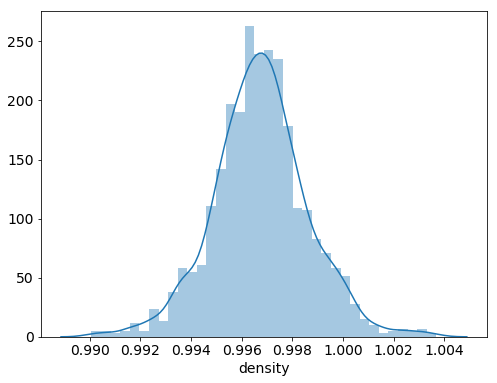

In [142]:
y_var = red.columns[7]
x_var = "quality"
data_var = red
sns.distributions.distplot(a=data_var.loc[:, y_var])

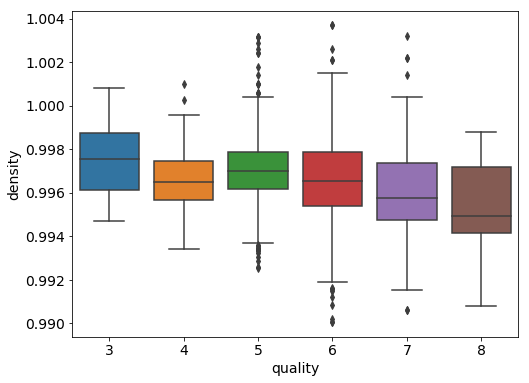

In [120]:
y_var = red.columns[7]
x_var = "quality"
data_var = red
sns.categorical.boxplot(x=x_var, y=y_var, data=data_var)

In [175]:
y_var = red.columns[7]
x_var = "quality"
data_var = red
univariate_median_by_quality = data_var.groupby(x_var).median()[y_var]

var = univariate_median_by_quality.name
min_rating = univariate_median_by_quality.index[0]
min_median = univariate_median_by_quality.iloc[0]
max_rating = univariate_median_by_quality.index[-1]
max_median = univariate_median_by_quality.iloc[-1]
range_median = abs(univariate_median_by_quality.iloc[-1] - univariate_median_by_quality.iloc[0])
perc_range = range_median / min_median

print("Variable: {}".format(var))
print("Median of minimum quality (rating {}): {}".format(min_rating, min_median))
print("Median of maximum quality (rating {}): {}".format(max_rating, max_median))
print("Median range: {}".format(range_median))
print("Median range % : {:.1f}%".format(perc_range*100))


Variable: density
Median of minimum quality (rating 3): 0.997565
Median of maximum quality (rating 8): 0.99494
Median range: 0.0026249999999999885
Median range % : 0.3%


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


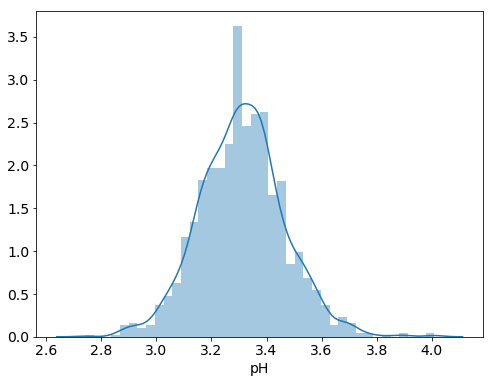

In [143]:
y_var = red.columns[8]
x_var = "quality"
data_var = red
sns.distributions.distplot(a=data_var.loc[:, y_var])

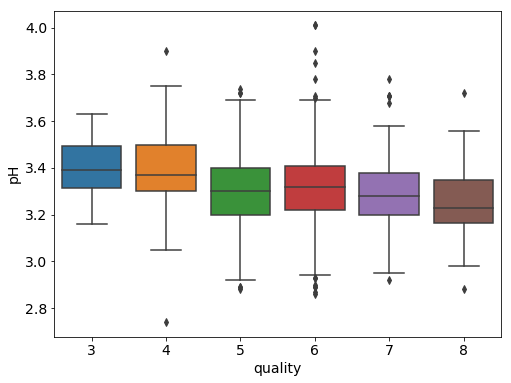

In [121]:
y_var = red.columns[8]
x_var = "quality"
data_var = red
sns.categorical.boxplot(x=x_var, y=y_var, data=data_var)

In [176]:
y_var = red.columns[8]
x_var = "quality"
data_var = red
univariate_median_by_quality = data_var.groupby(x_var).median()[y_var]

var = univariate_median_by_quality.name
min_rating = univariate_median_by_quality.index[0]
min_median = univariate_median_by_quality.iloc[0]
max_rating = univariate_median_by_quality.index[-1]
max_median = univariate_median_by_quality.iloc[-1]
range_median = abs(univariate_median_by_quality.iloc[-1] - univariate_median_by_quality.iloc[0])
perc_range = range_median / min_median

print("Variable: {}".format(var))
print("Median of minimum quality (rating {}): {}".format(min_rating, min_median))
print("Median of maximum quality (rating {}): {}".format(max_rating, max_median))
print("Median range: {}".format(range_median))
print("Median range % : {:.1f}%".format(perc_range*100))


Variable: pH
Median of minimum quality (rating 3): 3.3899999999999997
Median of maximum quality (rating 8): 3.23
Median range: 0.1599999999999997
Median range % : 4.7%


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


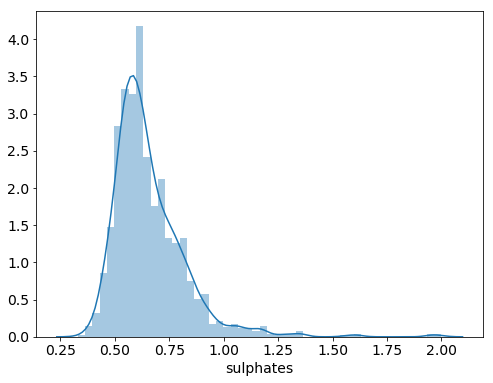

In [144]:
y_var = red.columns[9]
x_var = "quality"
data_var = red
sns.distributions.distplot(a=data_var.loc[:, y_var])

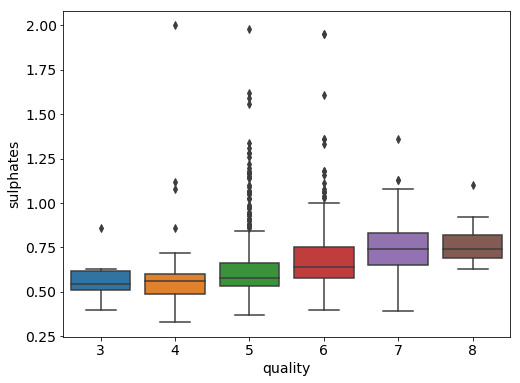

In [122]:
y_var = red.columns[9]
x_var = "quality"
data_var = red
sns.categorical.boxplot(x=x_var, y=y_var, data=data_var)

In [177]:
y_var = red.columns[9]
x_var = "quality"
data_var = red
univariate_median_by_quality = data_var.groupby(x_var).median()[y_var]

var = univariate_median_by_quality.name
min_rating = univariate_median_by_quality.index[0]
min_median = univariate_median_by_quality.iloc[0]
max_rating = univariate_median_by_quality.index[-1]
max_median = univariate_median_by_quality.iloc[-1]
range_median = abs(univariate_median_by_quality.iloc[-1] - univariate_median_by_quality.iloc[0])
perc_range = range_median / min_median

print("Variable: {}".format(var))
print("Median of minimum quality (rating {}): {}".format(min_rating, min_median))
print("Median of maximum quality (rating {}): {}".format(max_rating, max_median))
print("Median range: {}".format(range_median))
print("Median range % : {:.1f}%".format(perc_range*100))


Variable: sulphates
Median of minimum quality (rating 3): 0.545
Median of maximum quality (rating 8): 0.74
Median range: 0.19499999999999995
Median range % : 35.8%


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


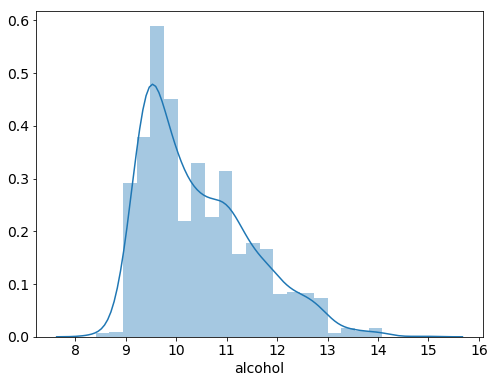

In [145]:
y_var = red.columns[10]
x_var = "quality"
data_var = red
sns.distributions.distplot(a=data_var.loc[:, y_var])

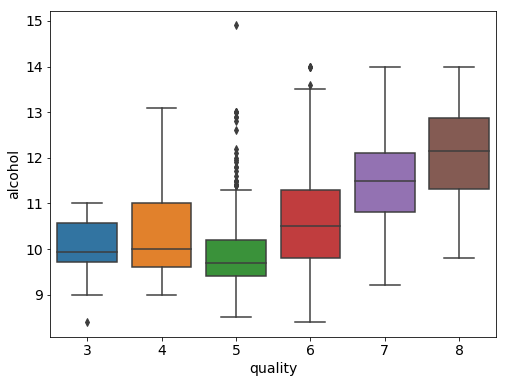

In [123]:
y_var = red.columns[10]
x_var = "quality"
data_var = red
sns.categorical.boxplot(x=x_var, y=y_var, data=data_var)

In [178]:
y_var = red.columns[10]
x_var = "quality"
data_var = red
univariate_median_by_quality = data_var.groupby(x_var).median()[y_var]

var = univariate_median_by_quality.name
min_rating = univariate_median_by_quality.index[0]
min_median = univariate_median_by_quality.iloc[0]
max_rating = univariate_median_by_quality.index[-1]
max_median = univariate_median_by_quality.iloc[-1]
range_median = abs(univariate_median_by_quality.iloc[-1] - univariate_median_by_quality.iloc[0])
perc_range = range_median / min_median

print("Variable: {}".format(var))
print("Median of minimum quality (rating {}): {}".format(min_rating, min_median))
print("Median of maximum quality (rating {}): {}".format(max_rating, max_median))
print("Median range: {}".format(range_median))
print("Median range % : {:.1f}%".format(perc_range*100))


Variable: alcohol
Median of minimum quality (rating 3): 9.925
Median of maximum quality (rating 8): 12.15
Median range: 2.2249999999999996
Median range % : 22.4%


In [181]:
### Examine correlations ###

In [182]:
# Determine if any of the explanatory variables are correlated
# (denoting interactions we need to be aware of)

In [184]:
# Set explanatory variable columns
feature_columns = [col for col in red.columns if col not in ("quality", "high_quality")]

In [186]:
# Examine corr
red[feature_columns].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


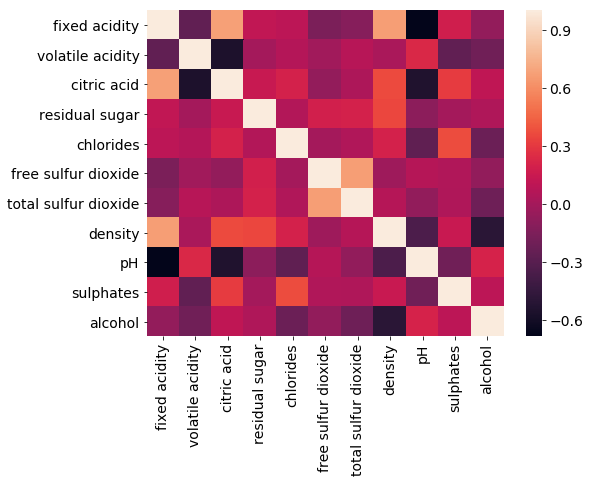

In [188]:
# Examine heatmap of corr
sns.heatmap(data=red[feature_columns].corr())

In [225]:
# Get combinations of columns
# Calculate correlation for each pair of variable values
# Test for thresholds:
# * Absolute value of correlation >= .40 (somewhat arbitrary, but < .40 often taken as weak corr)
# * Sample size large enough, i.e., correlation >= 2/square root of sample size
# * p-value of correlation <= .05 (p-value somewhat arbitrary but helps determine if correlation
#   value calculated differs significantly from 0)

for pair in combinations(feature_columns, 2):
    
    col1 = pair[0]
    col2 = pair[1]

    a = red.loc[:, col1]
    b = red.loc[:, col2]
    # Get smallest sample size
    n = min(len(a), len(b))

    # Create linear regression model
    reg = linregress(a, b)
    # Note: reg.rvalue == red.loc[:, col1].corr(red.loc[:, col2])
    #       but Pandas corr() function doesn't give p-value
    weak_test_pass = abs(reg.rvalue) >= .40
    sample_test_pass = reg.rvalue >= 2/sqrt(n)
    p_test_pass = reg.pvalue < .05
    if all([weak_test_pass, sample_test_pass, p_test_pass]):
        
        print(pair)
        print("Corr: {}".format(reg.rvalue))
        print("\n")
        

('fixed acidity', 'citric acid')
Corr: 0.6717034347641059


('fixed acidity', 'density')
Corr: 0.6680472921189742


('free sulfur dioxide', 'total sulfur dioxide')
Corr: 0.6676664504810216




In [31]:
### Fit a logistic regression model ###

In [33]:
# Set X and y for model
feature_columns = [col for col in red.columns if col not in ("quality", "high_quality")]
X = red.loc[:, feature_columns]

y = red.loc[:, "high_quality"]

In [35]:
# Verify size/shape of X and y
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (1599, 11)
y shape: (1599,)


In [37]:
# Set up training and testing split for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [64]:
# Verify size/shape of training and testing sets
for x in (X_train, X_test, y_train, y_test):
    print(x.shape)

(1199, 11)
(400, 11)
(1199,)
(400,)


In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
# Get coefficients

for i, col in enumerate(list(X.columns)):
    print("Coeff for column {}: {}".format(col,  logreg.coef_[0][i]))

Coeff for column fixed acidity: -0.059856586570952545
Coeff for column volatile acidity: -2.529867300116408
Coeff for column citric acid: -0.37051979893024795
Coeff for column residual sugar: 0.053968341520714995
Coeff for column chlorides: -1.06594094969255
Coeff for column free sulfur dioxide: 0.026030965211154125
Coeff for column total sulfur dioxide: -0.020309615724478577
Coeff for column density: -1.3240884176972045
Coeff for column pH: -1.557403307199427
Coeff for column sulphates: 1.988534523656202
Coeff for column alcohol: 0.8853494916751912


In [43]:
# make predictions for testing set
y_pred_class = logreg.predict(X_test)

In [44]:
# get probabilities
y_pred_prob = logreg.predict_proba(X_test)

In [49]:
print("Accuracy score: ",metrics.accuracy_score(y_test, y_pred_class))

Accuracy score:  0.72


In [65]:
# Store array of predicted prob for each column
y_pred_class

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [69]:
len(y_pred_prob)

400

In [70]:
len(y_pred_prob[0])

2

In [75]:
# y_pred_prob contains an array for each observation
# within each subarray is 
#     [probability obs is in class 0, probability obs is in class 1]

# Since we're interested in probability observations are high quality
# (class 1), store just those values
y_pred_prob_high_quality = y_pred_prob[:, 1]

In [74]:
logreg.classes_

array([0, 1])

In [73]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1210,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4
1337,6.0,0.50,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5
239,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0
397,11.5,0.59,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0
813,6.9,0.39,0.24,2.1,0.102,4.0,7.0,0.99462,3.44,0.58,11.4


In [76]:
# calculate AUC
print("AUC: ", metrics.roc_auc_score(y_test, y_pred_prob_high_quality))

AUC:  0.8101452536313408


In [51]:

# calculate cross-validated AUC
roc_auc_score_mean = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()
print("ROC AUC Score Mean: ", roc_auc_score_mean)

ROC AUC Score Mean:  0.8108480422967427


Text(0,0.5,'True Positive Rate (Sensitivity)')

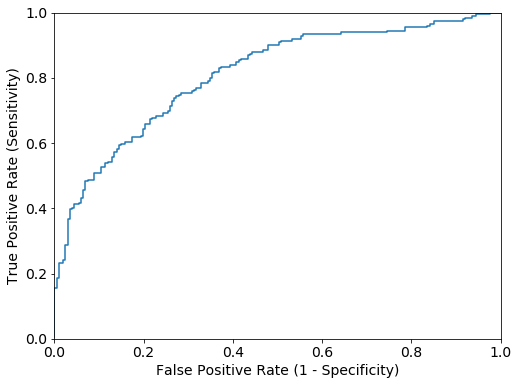

In [77]:
# Plot ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_high_quality)

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [79]:
# Calculate area under curve
# Ranges from .5 to 1 with higher better
print(metrics.roc_auc_score(y_test, y_pred_prob_high_quality))

0.8101452536313408


In [39]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solve

In [80]:
help(metrics.roc_auc_score)

Help on function roc_auc_score in module sklearn.metrics.ranking:

roc_auc_score(y_true, y_score, average='macro', sample_weight=None)
    Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    from prediction scores.
    
    Note: this implementation is restricted to the binary classification task
    or multilabel classification task in label indicator format.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples] or [n_samples, n_classes]
        True binary labels in binary label indicators.
    
    y_score : array, shape = [n_samples] or [n_samples, n_classes]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    average : string, [None, 'micro', 'macro' (default), 'samples', 'weighted']
        If ``None``, the 